# Dataset
- Dataset : MNIST Dataset: http://yann.lecun.com/exdb/mnist/
- Image Classification 
- Trains a simple deep NN
    - This post will take you through a simple implementation of convolutional neural netwotks using keras for classification of MNIST dataset.
    - The core data structure of Keras is a model, a way to organize layers. The simplest type of model is the Sequential model.It is a linear stack of neural network layers for feed forward cnn

#### Import Libraries

- Ignore warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

- The core data structure of Keras is a model, a way to organize layers. 
- The simplest type of model is the Sequential model. It is a linear stack of neural network layers for feed forward cnn
- Now we are importing core layers for our CNN netwrok. 
- Dense layer is actually a fully-connected layer.
- Dropout is a regularization technique used for reducing overfitting.
- Activation Function is used for introducing non-linearity.
- Flatten is used for converting output matrices into a vector.
- The second line is used for importing convolutional and pooling layers.
- To plot the dataset

In [2]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### Load the dataset

In [3]:
from keras.datasets import mnist

- mnist dataset is available in Keras
- Dataset will be like
![title](download.png)

- Default hyperparameters set

In [4]:
batch_size = 128
num_classes = 10
epochs = 10

- MNIST datset cosists of 28x28 size images of handwritten digits. 

In [5]:
img_rows, img_cols = 28, 28

- Dataset split between train and test sets

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

- As mnist dataset consist of number of images form which one can be plotted to understand shape of the images/

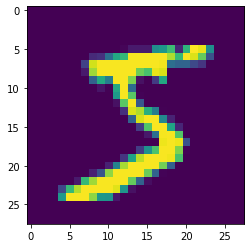

In [7]:
plt.imshow(x_train[0])
plt.show()

- We need to reshape our data to include number of channels. as images are preasent in grayscal i.e number of channels is equal to 1(for RGB, it is 3). 
- The present shape of our data is (N,H,W) where
        - N = total number of examples or batch size
        - H and W refer to height and width of the image respectively.
- Now reshaping will depend on which library your keras

In [8]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


- Conversion to float32 data type

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

- Normalising/Feature scaling input data for getting all our data in a similar range

In [10]:
x_train /= 255
x_test /= 255

- Check the shape of x_train and x_text dataset

In [11]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


- For classification of digits, we need 10 classes ranging from 0-9. So, our output set must contain such labels.We can check present shape of our output and even print first 10 of them using.
-  we need to convert 1-dimensional class arrays to 10-dimensional class matrices so now our data is divided into 10 classes.

In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

- Now we will add our first convulation layer with 32 kernels of sixe 3x3. The default stride value is (1,1).The activation function used is ReLu which is defined as max(x,0).Hence,it sets the negative elements to zero..Ourinput sample must be fed in (depth,width,height) format

In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


- Now we will define our cost/loss function and optimizing algorithm.

In [15]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

- To fit our model to trainig data, we need to define the batch size and number of epochs. Setting verbose = 1 gives an insight into the training process i.e. it displays remaining time, loss and accuracy for each epoch.

In [16]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 143s 2ms/step - loss: 0.2758 - acc: 0.9153 - val_loss: 0.0660 - val_acc: 0.9797
Epoch 2/10
60000/60000 [==============================] - 144s 2ms/step - loss: 0.0890 - acc: 0.9739 - val_loss: 0.0433 - val_acc: 0.9848
Epoch 3/10
60000/60000 [==============================] - 145s 2ms/step - loss: 0.0685 - acc: 0.9796 - val_loss: 0.0346 - val_acc: 0.9882
Epoch 4/10
60000/60000 [==============================] - 145s 2ms/step - loss: 0.0544 - acc: 0.9839 - val_loss: 0.0307 - val_acc: 0.9895
Epoch 5/10
60000/60000 [==============================] - 145s 2ms/step - loss: 0.0481 - acc: 0.9855 - val_loss: 0.0332 - val_acc: 0.9881
Epoch 6/10
60000/60000 [==============================] - 144s 2ms/step - loss: 0.0427 - acc: 0.9866 - val_loss: 0.0282 - val_acc: 0.9909
Epoch 7/10
60000/60000 [==============================] - 145s 2ms/step - 

- Calculate the score of model

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)

- Print Test losses and test accuracy

In [19]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02626639609753911
Test accuracy: 0.9907
